In [93]:
import re
import pandas as pd
import matplotlib.pyplot as plt


In [94]:
def read_format(path):
    with open(path, 'r') as file:
        data = file.read()

    pattern = r"train epoch (\d+) iter (\d+) ([\d.]+) iters/s loss total ([\d.]+) loss prediction ([\d.]+) acc ([\d.]+)"
    test_pattern = r"TEST loss ([\d.]+) accuracy ([\d.]+)"

    train_data = []
    for match in re.finditer(pattern, data):
        epoch, iter_, iters_s, loss_total, loss_pred, acc = match.groups()
        train_data.append({
            "epoch": int(epoch),
            "iter": int(iter_),
            "iters/s": float(iters_s),
            "loss_total": float(loss_total),
            "loss_prediction": float(loss_pred),
            "accuracy": float(acc)
        })

    test_data = []
    for match in re.finditer(test_pattern, data):
        test_loss, test_acc = match.groups()
        test_data.append({
            "loss": float(test_loss),
            "accuracy": float(test_acc)
        })
    
    df_train = pd.DataFrame(train_data)

    # Crear DataFrame de prueba
    df_test = pd.DataFrame(test_data)
    df_test['epoch'] = df_test.index


    normal_train=df_train.groupby('epoch', as_index=False).mean(['loss_total','loss_prediction','accuracy'])
    normal_test=df_test.groupby('epoch', as_index=False).mean(['loss_total','loss_prediction','accuracy'])
    return normal_train,normal_test

In [95]:
exp_dict = {
    1: {"size_embedding": 100, "lambda": 0, "path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/512/run_details.txt"},
    2: {"size_embedding": 95, "lambda": 0.001,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/486_0001/run_details.txt"},
    3: {"size_embedding": 90, "lambda": 0.001,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/460_0001/run_details.txt"},
    4: {"size_embedding": 80, "lambda": 0.001,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/409_0001/run_details.txt"},
    5: {"size_embedding": 70, "lambda": 0.001,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/358_0001/run_details.txt"},
    6: {"size_embedding": 50, "lambda": 0.001,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/256_0001/run_details.txt"},
    7: {"size_embedding": 95, "lambda": 0.01,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/486_001/run_details.txt"},
    8: {"size_embedding": 90, "lambda": 0.01,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/460_001/run_details.txt"},
    9: {"size_embedding": 80, "lambda": 0.01,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/409_001/run_details.txt"},
    10: {"size_embedding": 70, "lambda": 0.01,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/358_001/run_details.txt"},
    11: {"size_embedding": 50, "lambda": 0.01,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/256_001/run_details.txt"},
    12: {"size_embedding": 95, "lambda": 0.02,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/486_002/run_details.txt"},
    13: {"size_embedding": 90, "lambda": 0.02,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/460_002/run_details.txt"},
    14: {"size_embedding": 80, "lambda": 0.02,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/409_002/run_details.txt"},
    15: {"size_embedding": 70, "lambda": 0.02,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/358_002/run_details.txt"},
    16: {"size_embedding": 50, "lambda": 0.02,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/256_002/run_details.txt"},
    17: {"size_embedding": 50, "lambda": 0.03,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/256_003/run_details.txt"},
    18: {"size_embedding": 50, "lambda": 0.05,"path":"/home/mcsalazart/Documents/CS/BDRP/RESULTS_JAN/256_005/run_details.txt"},
}



In [96]:
for exp_id, exp_info in exp_dict.items():
    path = exp_info["path"]
    try:
        train_data, test_data = read_format(path)
        exp_dict[exp_id]["train_data"] = train_data
        exp_dict[exp_id]["test_data"] = test_data
    except FileNotFoundError:
        print(f"Archivo no encontrado para el experimento {exp_id}: {path}")
    except Exception as e:
        print(f"Error procesando {path}: {e}")


/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

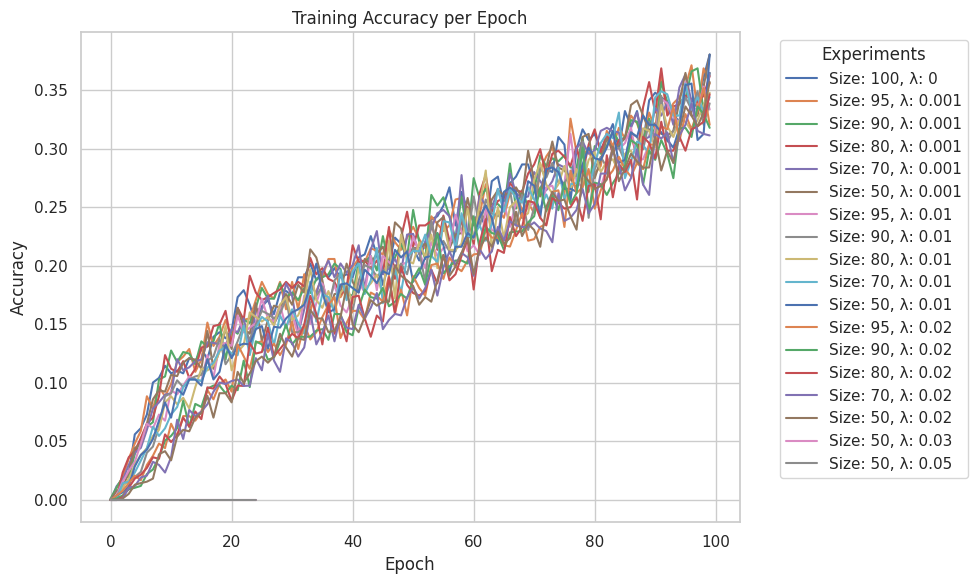

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Iterar sobre los experimentos para graficar los datos
for exp_id, exp_info in exp_dict.items():
    if "train_data" in exp_info:
        df_train = exp_info["train_data"]
        label = f"Size: {exp_info['size_embedding']}, λ: {exp_info['lambda']}"  # Leyenda
        
        # Graficar la curva de entrenamiento
        sns.lineplot(x=df_train["epoch"], y=df_train["accuracy"], label=label)

# Configurar títulos y etiquetas
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(title="Experiments", bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.tight_layout()
plt.show()


/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

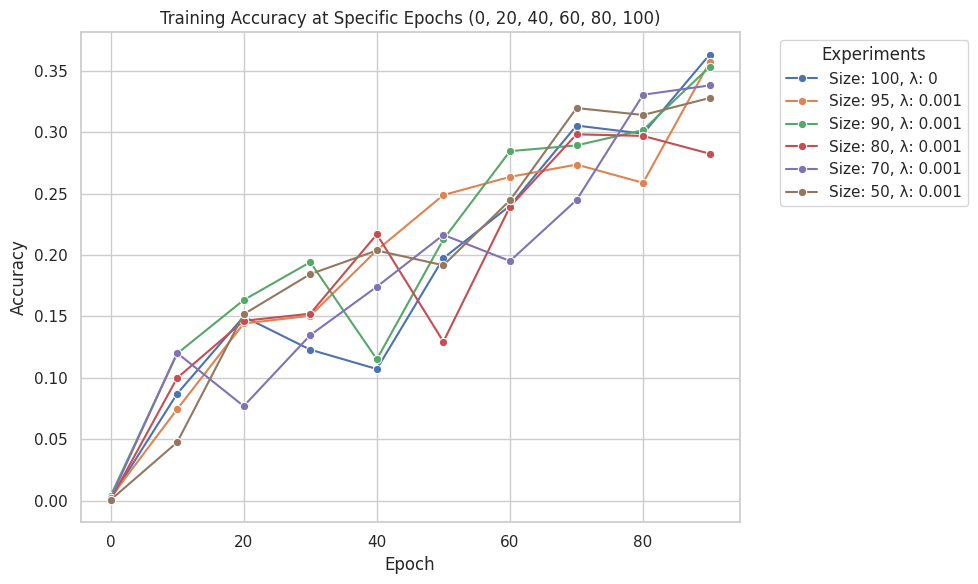

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Definir los valores de lambda que deseas comparar para cada baseline
lambdas_to_compare = [0, 0.001]  # Baseline, lambda=0.001, lambda=0.01

# Definir los epochs que quieres graficar
epochs_to_plot = [0,10, 20,30, 40,50, 60,70, 80, 90,100]

# Iterar sobre los experimentos para graficar los datos seleccionados
for exp_id, exp_info in exp_dict.items():
    # Si el experimento tiene "train_data" y su lambda está en los valores a comparar
    if "test_data" in exp_info and exp_info["lambda"] in lambdas_to_compare:
        df_train = exp_info["test_data"]
        label = f"Size: {exp_info['size_embedding']}, λ: {exp_info['lambda']}"  # Leyenda
        
        # Filtrar solo los epochs que deseas
        df_filtered = df_train[df_train['epoch'].isin(epochs_to_plot)]

        # Graficar la curva para los epochs seleccionados
        sns.lineplot(x=df_filtered["epoch"], y=df_filtered["accuracy"], label=label, marker='o')

# Configurar títulos y etiquetas
plt.title("Training Accuracy at Specific Epochs (0, 20, 40, 60, 80, 100)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(title="Experiments", bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.tight_layout()
plt.show()


/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mcsalazart/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

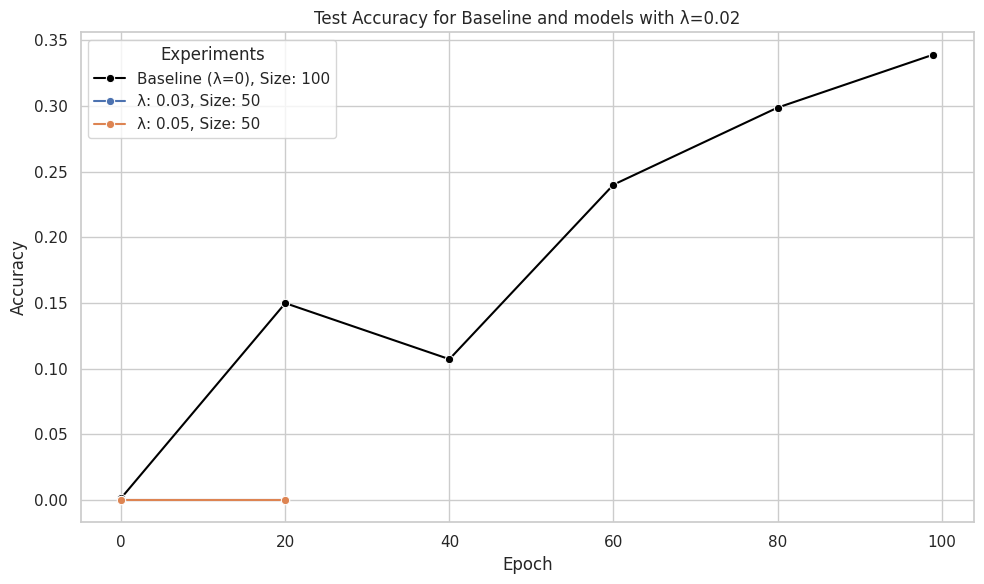

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Definir el baseline y los lambdas que deseas comparar
baseline_lambda = 0  # Baseline (lambda=0)
lambdas_to_compare = [0.03,0.05]  # Otros valores de lambda

# Definir los epochs que quieres graficar
epochs_to_plot = [0, 20, 40, 60, 80, 99]

# Graficar el baseline (lambda=0)
baseline_data = [exp_info for exp_id, exp_info in exp_dict.items() if exp_info["lambda"] == baseline_lambda]
for exp_info in baseline_data:
    df_train = exp_info["test_data"]
    label = f"Baseline (λ={baseline_lambda}), Size: {exp_info['size_embedding']}"  # Leyenda
    
    # Filtrar solo los epochs que deseas
    df_filtered = df_train[df_train['epoch'].isin(epochs_to_plot)]

    # Graficar la curva para el baseline
    sns.lineplot(x=df_filtered["epoch"], y=df_filtered["accuracy"], label=label, marker='o', linestyle='-', color='black')

# Graficar otros experimentos con diferentes `size_embedding` y `lambda`
for exp_id, exp_info in exp_dict.items():
    if exp_info["lambda"] in lambdas_to_compare and exp_info["lambda"] != baseline_lambda:
        df_train = exp_info["test_data"]
        label = f"λ: {exp_info['lambda']}, Size: {exp_info['size_embedding']}"  # Leyenda
        
        # Filtrar solo los epochs que deseas
        df_filtered = df_train[df_train['epoch'].isin(epochs_to_plot)]

        # Graficar la curva para los otros valores de lambda
        sns.lineplot(x=df_filtered["epoch"], y=df_filtered["accuracy"], label=label, marker='o')

# Configurar títulos y etiquetas
plt.title(f"Test Accuracy for Baseline and models with λ=0.03 and λ=0.05 ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(title="Experiments", loc='upper left', frameon=True)
plt.tight_layout()
plt.show()


In [100]:
# Crear DataFrame de entrenamiento
df_train_1 = pd.DataFrame(train_data)

# Crear DataFrame de prueba
df_test_1 = pd.DataFrame(test_data)
df_test_1['epoch'] = df_test_1.index


alter_train=df_train_1.groupby('epoch', as_index=False).mean(['loss_total','loss_prediction','accuracy'])
alter_test=df_test_1.groupby('epoch', as_index=False).mean(['loss_total','loss_prediction','accuracy'])

In [101]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot for df_train_0
plt.plot(normal_test['epoch'], normal_test['accuracy'], label=r'Test $ {\lambda=0}$', color='green', linewidth=2)
plt.plot(normal_train['epoch'], normal_train['accuracy'], label=r'Train ${\lambda=0}$', color='blue', alpha=0.6)

# Plot for df_train_1
plt.plot(alter_test['epoch'], alter_test['accuracy'], label=r'Test $ {\lambda=0.01}$', color='orange', linewidth=2)
plt.plot(alter_train['epoch'], alter_train['accuracy'], label=r'Train ${\lambda=0.01}$', color='red', alpha=0.6)

# Adding label at the last point of epoch 99 for normal_train
last_epoch_99_train = normal_train[normal_train['epoch'] == 99]['accuracy'].values[0]
last_epoch_99_test = normal_test[normal_test['epoch'] == 99]['accuracy'].values[0]
last_epoch_99_train_A = alter_train[alter_train['epoch'] == 99]['accuracy'].values[0]
last_epoch_99_test_A = alter_test[alter_test['epoch'] == 99]['accuracy'].values[0]
plt.text(99, last_epoch_99_train, f'{last_epoch_99_train:.2f}', color='black', fontsize=8, ha='left', va='bottom')
plt.text(99, last_epoch_99_test, f'{last_epoch_99_test:.2f}', color='black', fontsize=8, ha='left', va='bottom')
plt.text(99, last_epoch_99_train_A, f'{last_epoch_99_train_A:.2f}', color='black', fontsize=8, ha='left', va='bottom')
plt.text(99, last_epoch_99_test_A, f'{last_epoch_99_test_A:.2f}', color='black', fontsize=8, ha='left', va='bottom')

# Labels and legend
plt.title('Accuracy Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'normal_test' is not defined

<Figure size 1200x600 with 0 Axes>

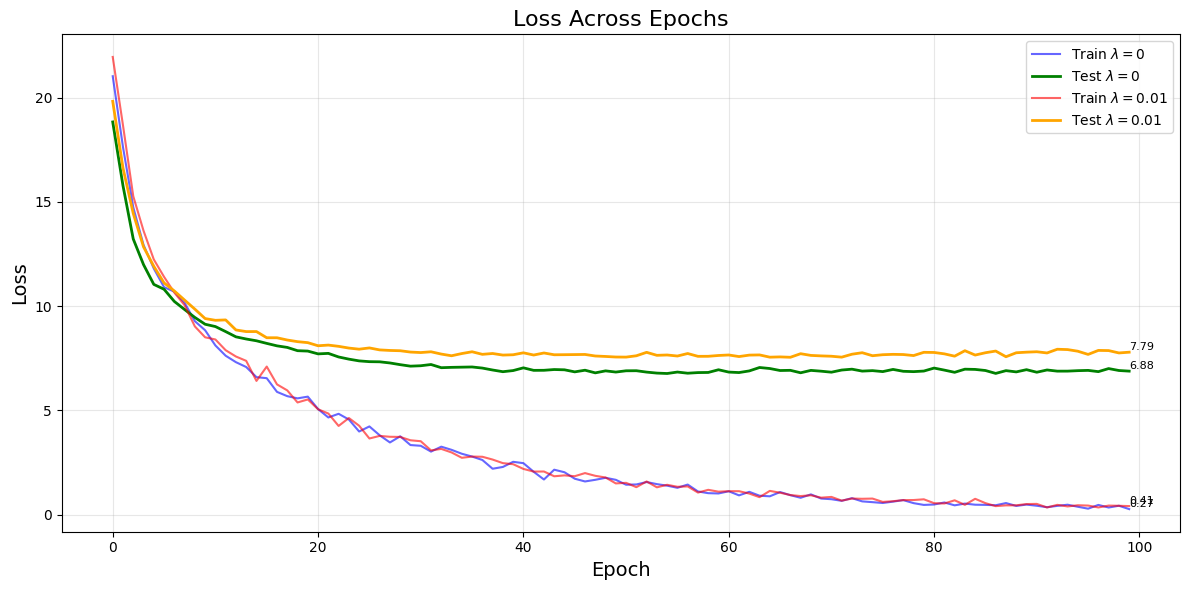

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot for df_train_0
plt.plot(normal_train['epoch'], normal_train['loss_total'], label=r'Train ${\lambda=0}$', color='blue', alpha=0.6)
plt.plot(normal_test['epoch'], normal_test['loss'], label=r'Test $ {\lambda=0}$', color='green', linewidth=2)


# Plot for df_train_1
plt.plot(alter_train['epoch'], alter_train['loss_total'], label=r'Train ${\lambda=0.01}$', color='red', alpha=0.6,)
plt.plot(alter_test['epoch'], alter_test['loss'], label=r'Test $ {\lambda=0.01}$', color='orange', linewidth=2)


# Adding label at the last point of epoch 99 for normal_train
last_epoch_99_train = normal_train[normal_train['epoch'] == 99]['loss_total'].values[0]
last_epoch_99_test = normal_test[normal_test['epoch'] == 99]['loss'].values[0]
last_epoch_99_train_A = alter_train[alter_train['epoch'] == 99]['loss_total'].values[0]
last_epoch_99_test_A = alter_test[alter_test['epoch'] == 99]['loss'].values[0]
plt.text(99, last_epoch_99_train, f'{last_epoch_99_train:.2f}', color='black', fontsize=8, ha='left', va='bottom')
plt.text(99, last_epoch_99_test, f'{last_epoch_99_test:.2f}', color='black', fontsize=8, ha='left', va='bottom')
plt.text(99, last_epoch_99_train_A, f'{last_epoch_99_train_A:.2f}', color='black', fontsize=8, ha='left', va='bottom')
plt.text(99, last_epoch_99_test_A, f'{last_epoch_99_test_A:.2f}', color='black', fontsize=8, ha='left', va='bottom')

# Labels and legend
plt.title('Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()